In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The goal of this code is to crate graphs to interpret the data we obtained and that are stored in the csv file called flydata_AS_resume.csv

In [2]:
# Load the data
df = pd.read_csv('flydata_AS_resume.csv')

In [4]:
#normalize the data
#we want to have a number of flies for each condition that is normalized to the total number of flies in the experiment
#this is because the number of flies for each condition can vary and we want to be able to compare the conditions
#to do this we will divide the number of flies for each condition by the total number of flies in the experiment
#and multiply by 100 to get a percentage

#create a column in the dataframe for normalized number of flies for each condition
df['norm_flies'] = 0

#first we need to calculate the total number of flies in the experiment =  number of rows of the dataframe df
#3 x 9 x 5 = 135 flies but we dropped some when analysing data in the previous code
total_flies = df.shape[0]

#calculate the total number of flies used to orange and starved (both conditions happening together) 
total_flies_orange_starved = df[(df['habituation_cond'] == 'orange') | (df['starving_cond'] == 'starved')].shape[0]
total_flies_orange_starved_norm = total_flies_orange_starved / total_flies * 100
#save this value in the dataframe column norm_flies in all the rows that have the orange and starved conditions 
df.loc[(df['habituation_cond'] == 'orange') | (df['starving_cond'] == 'starved'), 'norm_flies'] = total_flies_orange_starved_norm

#calculate the total number of flies used to orange and fed (both conditions happening together)
total_flies_orange_fed = df[(df['habituation_cond'] == 'orange') | (df['starving_cond'] == 'fed')].shape[0]
total_flies_orange_fed_norm = total_flies_orange_fed / total_flies * 100
#save this value in the dataframe column norm_flies in all the rows that have the orange and fed conditions
df.loc[(df['habituation_cond'] == 'orange') | (df['starving_cond'] == 'fed'), 'norm_flies'] = total_flies_orange_fed_norm

#calculate the total number of flies used to blue and starved (both conditions happening together)
total_flies_blue_starved = df[(df['habituation_cond'] == 'blue') | (df['starving_cond'] == 'starved')].shape[0]
total_flies_blue_starved_norm = total_flies_blue_starved / total_flies * 100
#save this value in the dataframe column norm_flies in all the rows that have the blue and starved conditions
df.loc[(df['habituation_cond'] == 'blue') | (df['starving_cond'] == 'starved'), 'norm_flies'] = total_flies_blue_starved_norm

#calculate the total number of flies used to blue and fed (both conditions happening together)
total_flies_blue_fed = df[(df['habituation_cond'] == 'blue') | (df['starving_cond'] == 'fed')].shape[0]
total_flies_blue_fed_norm = total_flies_blue_fed / total_flies * 100
#save this value in the dataframe column norm_flies in all the rows that have the blue and fed conditions
df.loc[(df['habituation_cond'] == 'blue') | (df['starving_cond'] == 'fed'), 'norm_flies'] = total_flies_blue_fed_norm

#calculate the total number of flies unused and starved (both conditions happening together)
total_flies_unused_starved = df[(df['habituation_cond'] == 'unused') | (df['starving_cond'] == 'starved')].shape[0]
total_flies_unused_starved_norm = total_flies_unused_starved / total_flies * 100
#save this value in the dataframe column norm_flies in all the rows that have the unused and starved conditions
df.loc[(df['habituation_cond'] == 'unused') | (df['starving_cond'] == 'starved'), 'norm_flies'] = total_flies_unused_starved_norm

#calculate the total number of flies unused and fed (both conditions happening together)
total_flies_unused_fed = df[(df['habituation_cond'] == 'unused') | (df['starving_cond'] == 'fed')].shape[0]
total_flies_unused_fed_norm = total_flies_unused_fed / total_flies * 100
#save this value in the dataframe column norm_flies in all the rows that have the unused and fed conditions
df.loc[(df['habituation_cond'] == 'unused') | (df['starving_cond'] == 'fed'), 'norm_flies'] = total_flies_unused_fed_norm


/var/folders/nd/vshpv27n41q6rxlmgnb5lq7w0000gn/T/ipykernel_65156/626731421.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '63.90977443609023' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['habituation_cond'] == 'orange') | (df['starving_cond'] == 'starved'), 'norm_flies'] = total_flies_orange_starved_norm


In [5]:
# Calculate total time of the five experiments
df['tot_time'] = df['tot_time_oran'] + df['tot_time_blue'] + df['tot_time_neutral']

In [6]:
#check if it is 1h - 3600 seconds
df["tot_time"]

0      3599.78096
1      3599.78096
2      3599.78096
3      3599.78096
4      3599.78096
          ...    
128    3599.78096
129    3599.78096
130    3599.78096
131    3599.78096
132    3599.78096
Name: tot_time, Length: 133, dtype: float64

The following barplots represents the percentage of total time spent interacting with an object or in the neural spaces of the arena for each condition.  

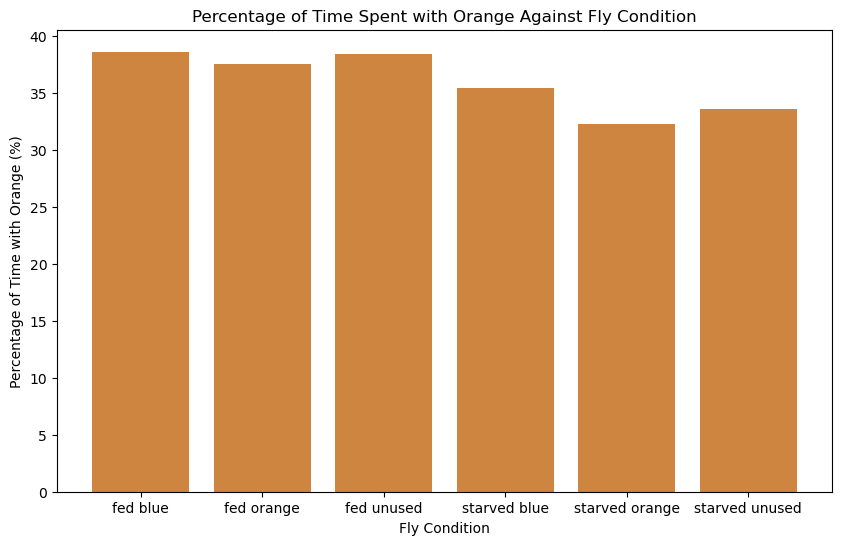

In [7]:
# Calculate the percentage of time spent with orange
df['percentage_time_oran'] = (df['tot_time_oran'] / df['tot_time']) * 100

# Group the data and calculate the sum of 'percentage_time_oran'
grouped = df.groupby(['starving_cond', 'habituation_cond'])['percentage_time_oran'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped['starving_cond'] + ' ' + grouped['habituation_cond'], grouped['percentage_time_oran'], color='peru')
plt.xlabel('Fly Condition')
plt.ylabel('Percentage of Time with Orange (%)')
plt.title('Percentage of Time Spent with Orange Against Fly Condition')
plt.show()

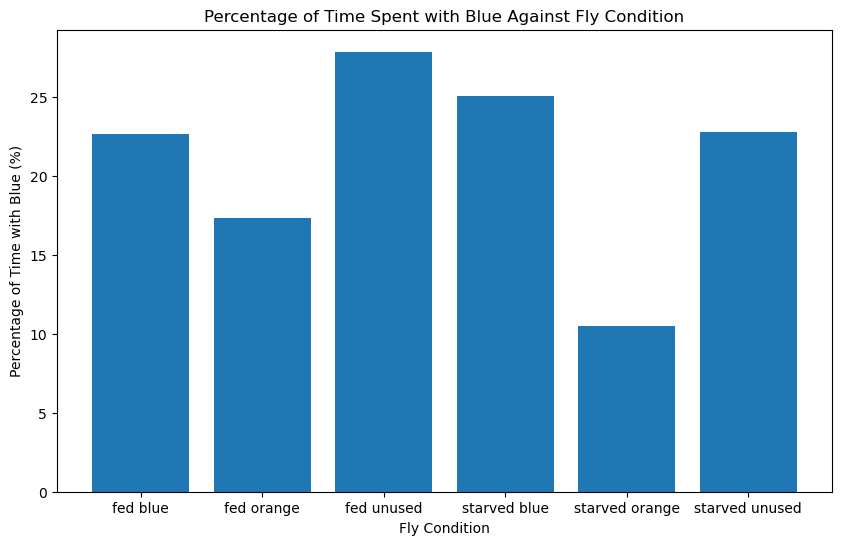

In [10]:
# Calculate the percentage of time spent with blue
df['percentage_time_blue'] = (df['tot_time_blue'] / df['tot_time']) * 100

# Group the data and calculate the sum of 'percentage_time_blue'
grouped = df.groupby(['starving_cond', 'habituation_cond'])['percentage_time_blue'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped['starving_cond'] + ' ' + grouped['habituation_cond'], grouped['percentage_time_blue'])
plt.xlabel('Fly Condition')
plt.ylabel('Percentage of Time with Blue (%)')
plt.title('Percentage of Time Spent with Blue Against Fly Condition')
plt.show()

C:\Users\win\AppData\Local\Temp\ipykernel_13108\2124575848.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_neutral = df.groupby(['starving_cond', 'habituation_cond']).apply(lambda x: x['percentage_time_neutral'].sum() / x['norm_flies'].count()).reset_index()


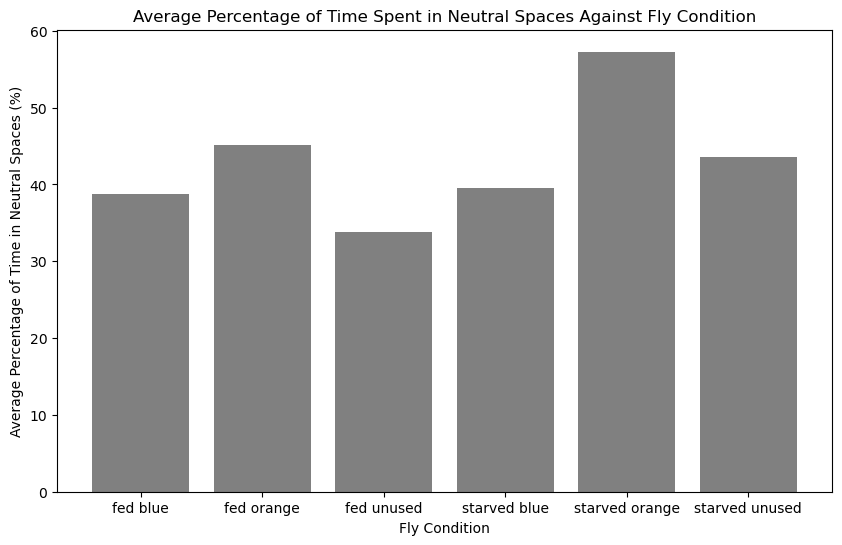

In [40]:
#percentage of time in neutral space (different way do compute it)
# Group the data and calculate the average of 'percentage_time_neutral' per 'norm_flies'
grouped_neutral = df.groupby(['starving_cond', 'habituation_cond']).apply(lambda x: x['percentage_time_neutral'].sum() / x['norm_flies'].count()).reset_index()
grouped_neutral.columns = ['starving_cond', 'habituation_cond', 'avg_percentage_neutral']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_neutral['starving_cond'] + ' ' + grouped_neutral['habituation_cond'], grouped_neutral['avg_percentage_neutral'], color='grey')
plt.xlabel('Fly Condition')
plt.ylabel('Average Percentage of Time in Neutral Spaces (%)')
plt.title('Average Percentage of Time Spent in Neutral Spaces Against Fly Condition')
plt.show()

The following two barplot shows the rate of first choices against habituation condition

C:\Users\win\AppData\Local\Temp\ipykernel_13108\409784473.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby(['habituation_cond']).apply(lambda x: x['first_choice_oran'].sum() / x['norm_flies'].count()* 100).reset_index()


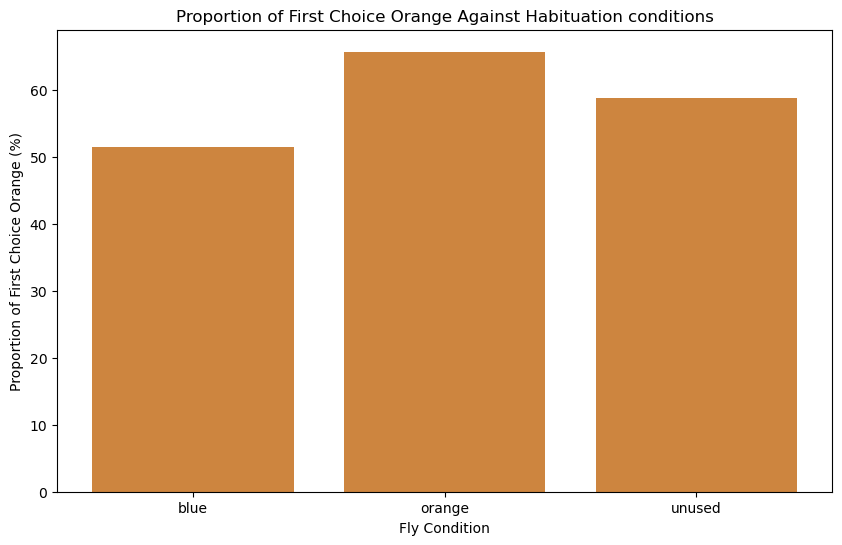

In [44]:
# Calculate the proportion of 'first_choice_oran' per 'norm_flies'
df['first_choice_oran'] = df['first_choice'] == 'orange'
grouped = df.groupby(['habituation_cond']).apply(lambda x: x['first_choice_oran'].sum() / x['norm_flies'].count()* 100).reset_index()
grouped.columns = ['habituation_cond', 'proportion_first_choice_oran']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped['habituation_cond'], grouped['proportion_first_choice_oran'], color='peru')
plt.xlabel('Fly Condition')
plt.ylabel('Proportion of First Choice Orange (%)')
plt.title('Proportion of First Choice Orange Against Habituation conditions')
plt.show()

C:\Users\win\AppData\Local\Temp\ipykernel_13108\106564020.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_blue = df.groupby(['habituation_cond']).apply(lambda x: (x['first_choice_blue'].sum() / x['norm_flies'].count()) * 100).reset_index()


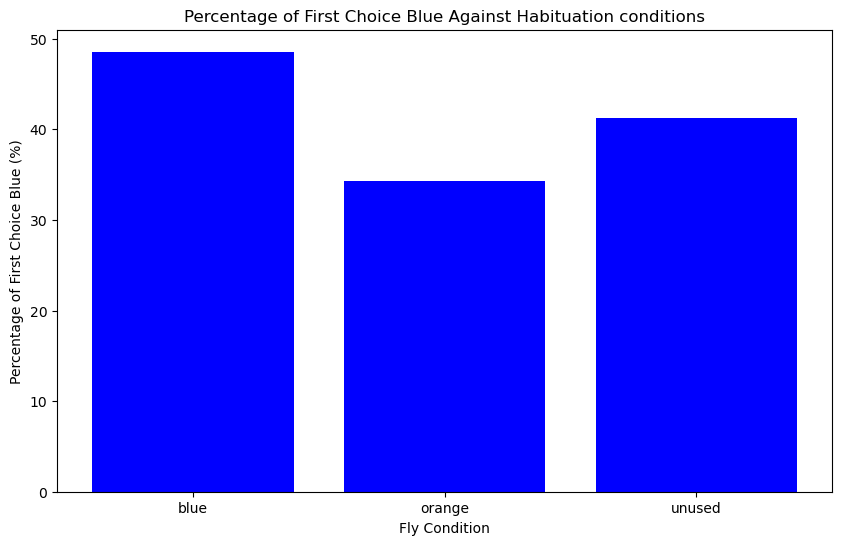

In [45]:
#barplot %of first choice blue vs fly condition
# Calculate the percentage of 'first_choice_blue' per 'norm_flies'
df['first_choice_blue'] = df['first_choice'] == 'blue'
grouped_blue = df.groupby(['habituation_cond']).apply(lambda x: (x['first_choice_blue'].sum() / x['norm_flies'].count()) * 100).reset_index()
grouped_blue.columns = ['habituation_cond', 'percentage_first_choice_blue']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_blue['habituation_cond'], grouped_blue['percentage_first_choice_blue'], color='blue')
plt.xlabel('Fly Condition')
plt.ylabel('Percentage of First Choice Blue (%)')
plt.title('Percentage of First Choice Blue Against Habituation conditions')
plt.show()

These pie chart shows the precentage of time spent interacting with the different objects (blue, orange and neutral spaces) per each fly condition

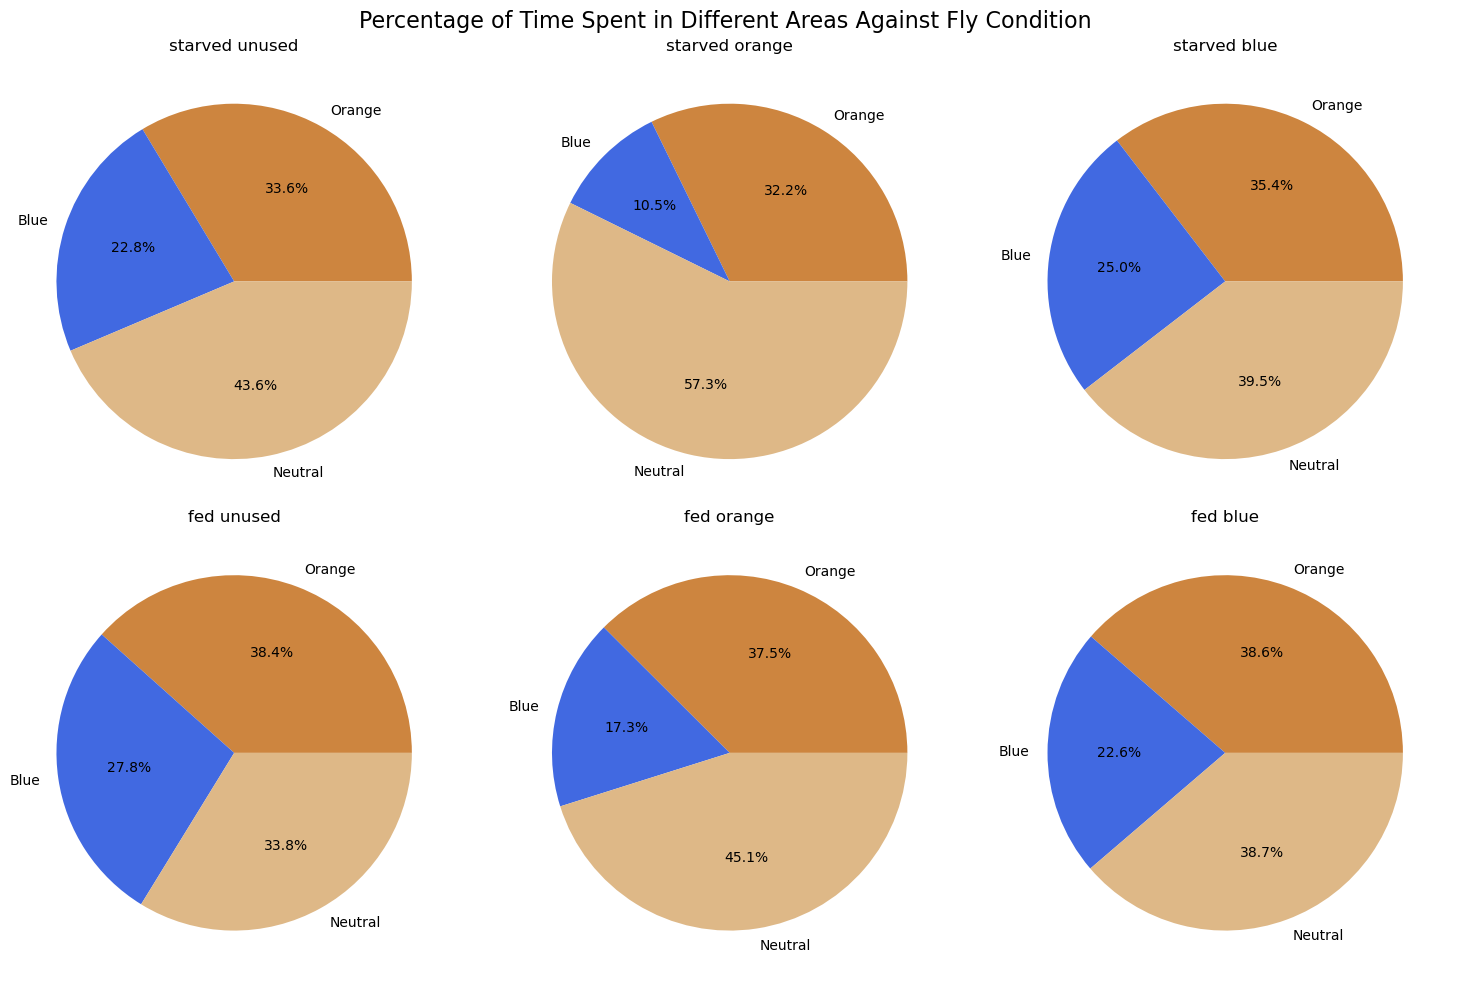

In [53]:
# Calculate the percentage of time spent with orange, blue, and neutral normalized on the total time for each condition
df['percentage_time_oran'] = (df['tot_time_oran'] / df['tot_time']) * 100
df['percentage_time_blue'] = (df['tot_time_blue'] / df['tot_time']) * 100
df['percentage_time_neutral'] = (df['tot_time_neutral'] / df['tot_time']) * 100

# Get the unique fly conditions
conditions = df['starving_cond'] + ' ' + df['habituation_cond']
unique_conditions = conditions.unique()

# Create a pie chart for each fly condition
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
colors = ['peru', 'royalblue', 'burlywood']
for i, condition in enumerate(unique_conditions):
    row = i // 3
    col = i % 3
    condition_df = df[conditions == condition]
    percentages = [condition_df['percentage_time_oran'].mean(), condition_df['percentage_time_blue'].mean(), condition_df['percentage_time_neutral'].mean()]
    axs[row, col].pie(percentages, labels=['Orange', 'Blue', 'Neutral'], autopct='%1.1f%%', colors=colors)
    axs[row, col].set_title(f'{condition}')
fig.suptitle('Percentage of Time Spent in Different Areas Against Fly Condition', fontsize=16) 
plt.tight_layout()
plt.show()

The two following barplots shows the rate of interaction with the two type of food-object under each type of fly condition.

C:\Users\win\AppData\Local\Temp\ipykernel_13108\2168393933.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby(['starving_cond', 'habituation_cond']).apply(lambda x: (x['rate_interactions_blue'].sum() / x['norm_flies'].count()).mean() * 100).reset_index()


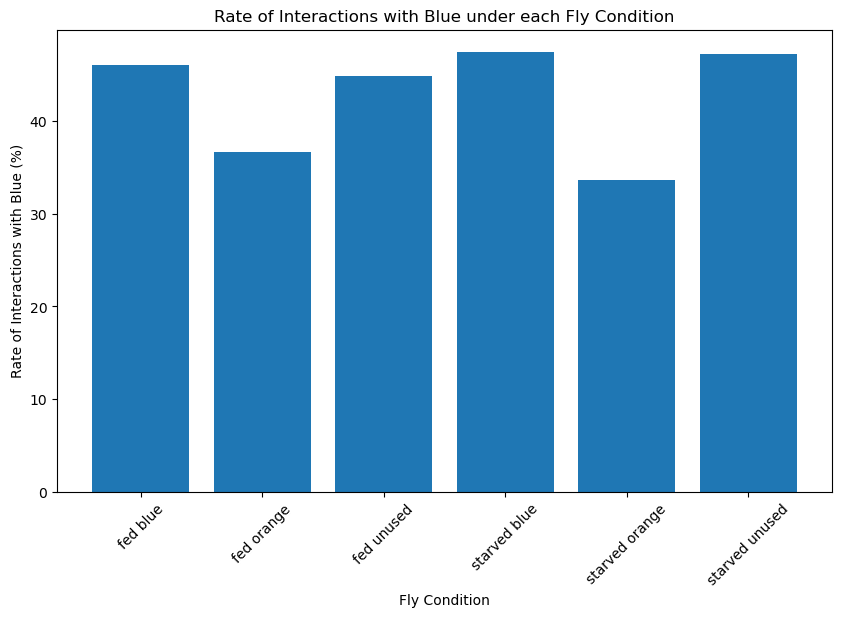

In [55]:
#rate of interaction = number of interactions with an obj/ total interactions with all objects
# Calculate the mean rate of interaction with blue for each condition, normalized by 'norm_flies', and convert it to a percentage
grouped = df.groupby(['starving_cond', 'habituation_cond']).apply(lambda x: (x['rate_interactions_blue'].sum() / x['norm_flies'].count()).mean() * 100).reset_index()
grouped.columns = ['starving_cond', 'habituation_cond', 'percentage_interactions_blue']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped['starving_cond'] + ' ' + grouped['habituation_cond'], grouped['percentage_interactions_blue'])
plt.xlabel('Fly Condition')
plt.ylabel('Rate of Interactions with Blue (%)')
plt.title('Rate of Interactions with Blue under each Fly Condition')
plt.xticks(rotation=45)
plt.show()

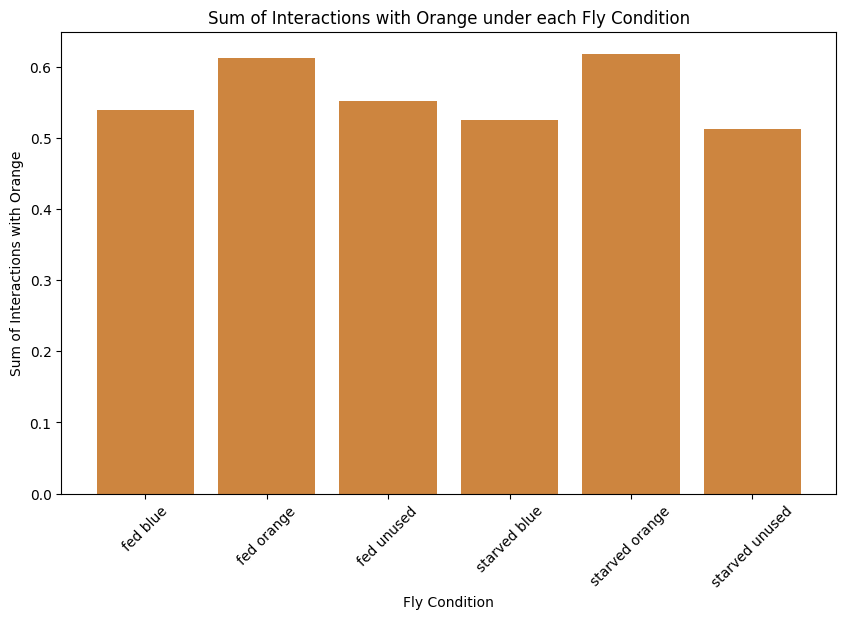

In [14]:
grouped = df.groupby(['starving_cond', 'habituation_cond'])['rate_interactions_oran'].mean().reset_index()
grouped.columns = ['starving_cond', 'habituation_cond', 'sum_interactions_oran']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped['starving_cond'] + ' ' + grouped['habituation_cond'], grouped['sum_interactions_oran'], color = "peru")
plt.xlabel('Fly Condition')
plt.ylabel('Sum of Interactions with Orange')
plt.title('Sum of Interactions with Orange under each Fly Condition')
plt.xticks(rotation=45)
plt.show()

/var/folders/nd/vshpv27n41q6rxlmgnb5lq7w0000gn/T/ipykernel_65156/3356207932.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby(['starving_cond', 'habituation_cond']).apply(lambda x: (x['rate_interactions_oran'].sum() / x['norm_flies'].count()).mean() * 100).reset_index()


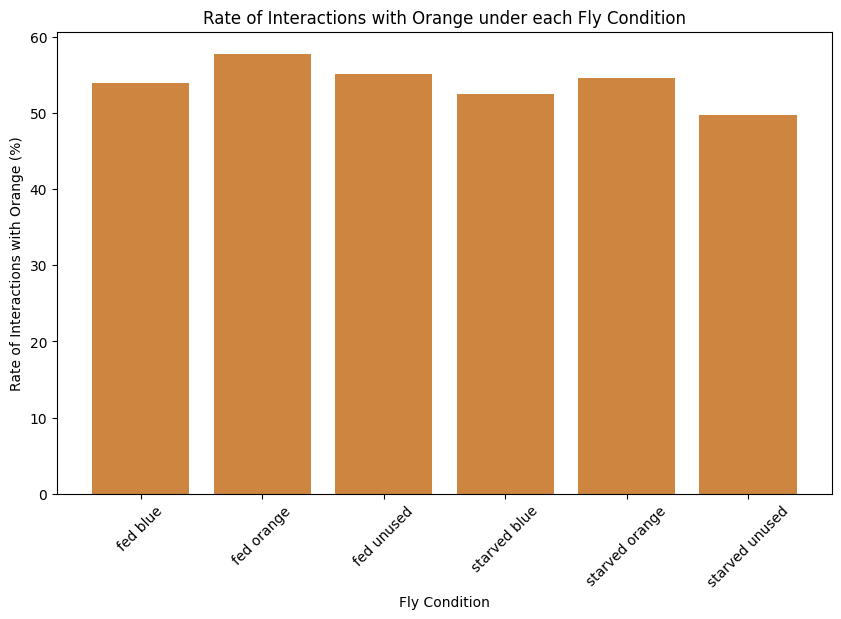

In [9]:
#rate of interaction = number of interactions with an obj/ total interactions with all objects
# Calculate the mean rate of interaction with blue for each condition, normalized by 'norm_flies', and convert it to a percentage
grouped = df.groupby(['starving_cond', 'habituation_cond']).apply(lambda x: (x['rate_interactions_oran'].sum() / x['norm_flies'].count()).mean() * 100).reset_index()
grouped.columns = ['starving_cond', 'habituation_cond', 'percentage_interactions_oran']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped['starving_cond'] + ' ' + grouped['habituation_cond'], grouped['percentage_interactions_oran'], color = "peru")
plt.xlabel('Fly Condition')
plt.ylabel('Rate of Interactions with Orange (%)')
plt.title('Rate of Interactions with Orange under each Fly Condition')
plt.xticks(rotation=45)
plt.show()

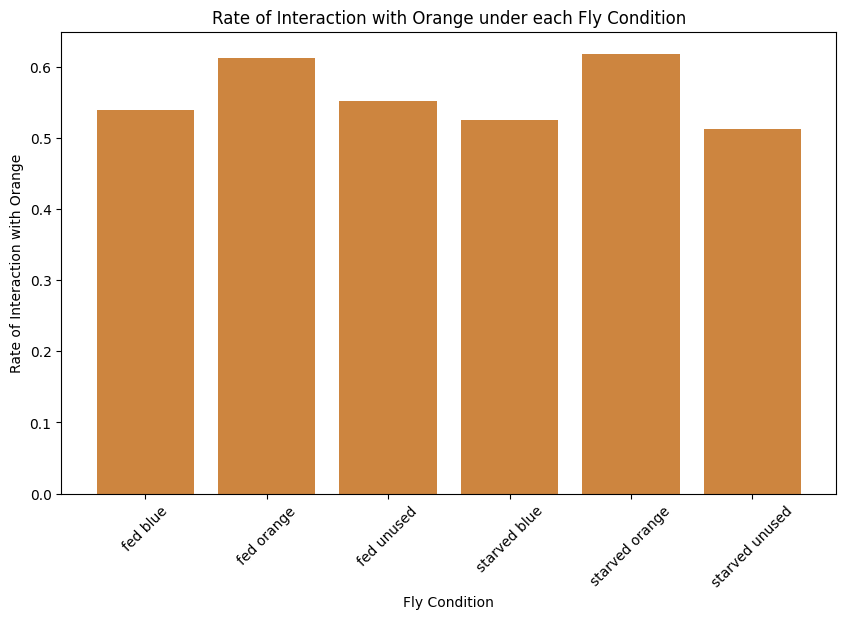

In [11]:
#THIS IS NOT NORMALIZED SO I THINK IT IS WRONG
#rate of interaction = number of interactions with an obj/ total interactions with all objects
# Calculate the mean rate of interaction with blue for each condition
grouped = df.groupby(['starving_cond', 'habituation_cond'])['rate_interactions_oran'].mean().reset_index() 

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped['starving_cond'] + ' ' + grouped['habituation_cond'], grouped['rate_interactions_oran'], color='peru')  
plt.xlabel('Fly Condition')
plt.ylabel('Rate of Interaction with Orange')
plt.title('Rate of Interaction with Orange under each Fly Condition')
plt.xticks(rotation=45)
plt.show()

Max consecutive time on orange and blue over conditions

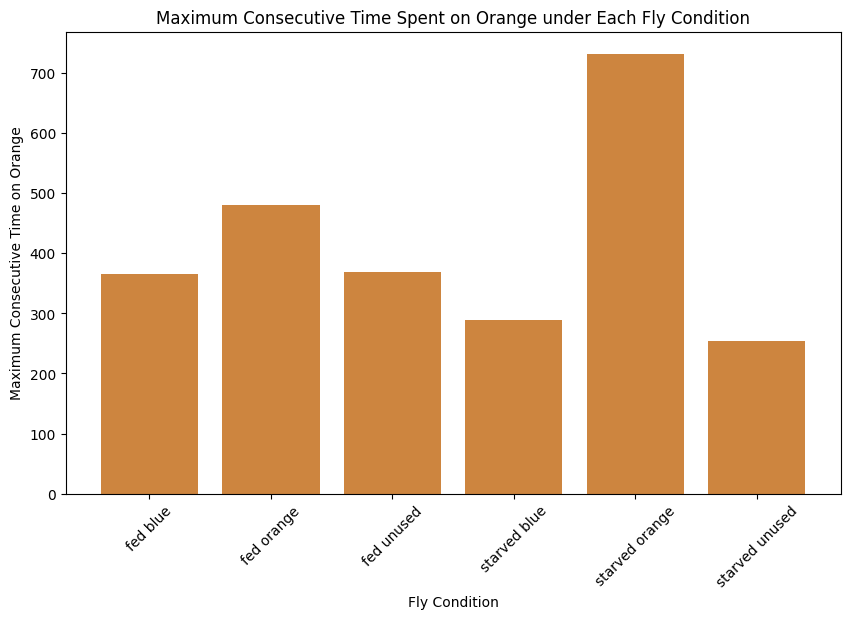

In [87]:
# Calculate the maximum consecutive time spent on orange for each condition
grouped = df.groupby(['starving_cond', 'habituation_cond'])['max_consec_time_oran'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped['starving_cond'] + ' ' + grouped['habituation_cond'], grouped['max_consec_time_oran'], color='peru')
plt.xlabel('Fly Condition')
plt.ylabel('Maximum Consecutive Time on Orange (%)')
plt.title('% Maximum Consecutive Time Spent on Orange Against Fly Condition')
plt.xticks(rotation=45)
plt.show()

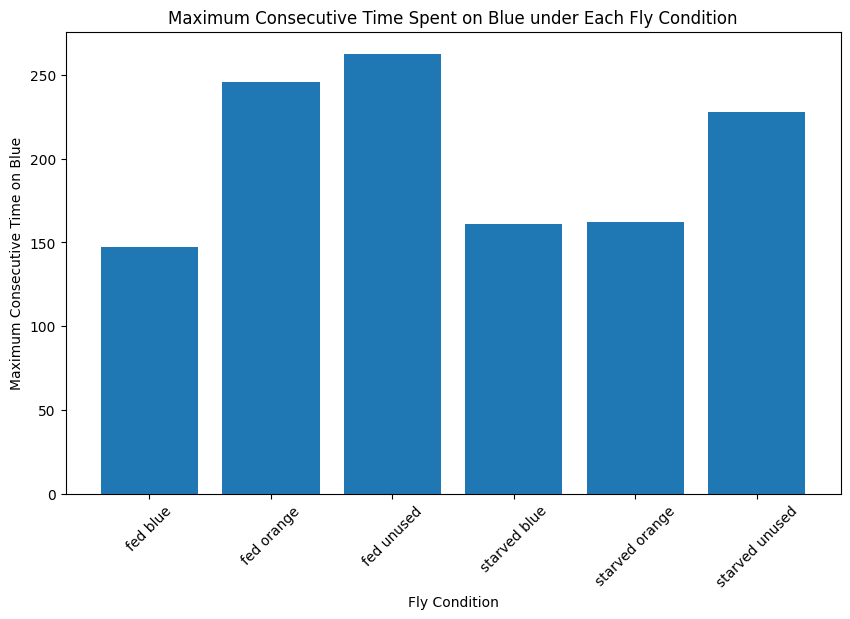

In [94]:
# Calculate the maximum consecutive time spent on blue for each condition
grouped = df.groupby(['starving_cond', 'habituation_cond'])['max_consec_time_blue'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped['starving_cond'] + ' ' + grouped['habituation_cond'], grouped['max_consec_time_blue'])
plt.xlabel('Fly Condition')
plt.ylabel('Maximum Consecutive Time on Blue')
plt.title('Maximum Consecutive Time Spent on Blue under Each Fly Condition')
plt.xticks(rotation=45)
plt.show()



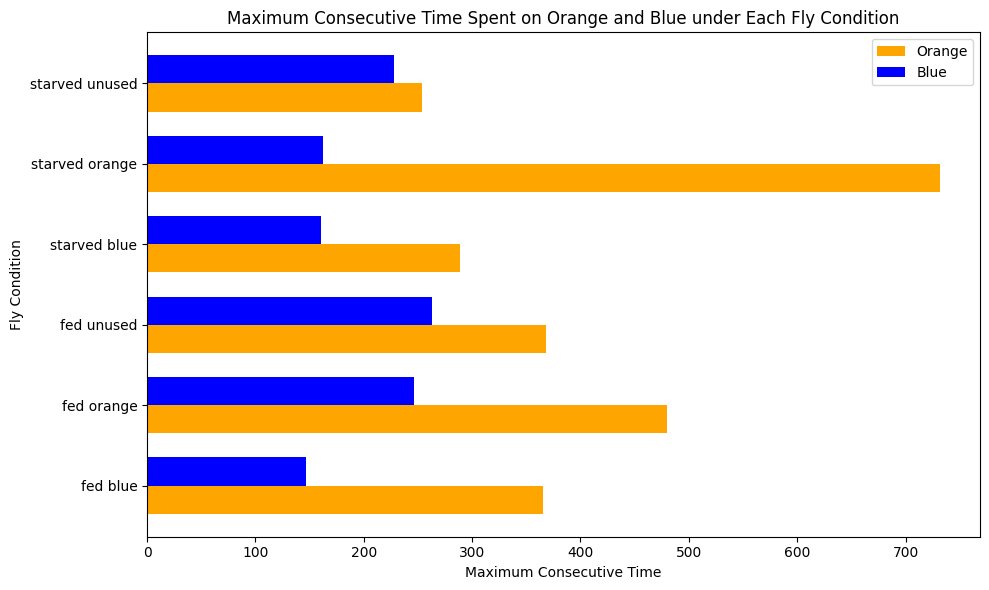

In [93]:
# Calculate the maximum consecutive time spent on orange and blue for each condition
grouped_oran = df.groupby(['starving_cond', 'habituation_cond'])['max_consec_time_oran'].mean().reset_index()
grouped_blue = df.groupby(['starving_cond', 'habituation_cond'])['max_consec_time_blue'].mean().reset_index()

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(grouped_oran))

plt.barh(index, grouped_oran['max_consec_time_oran'], color='orange', height=bar_width, label='Orange')
plt.barh(index + bar_width, grouped_blue['max_consec_time_blue'], color='blue', height=bar_width, label='Blue')

plt.xlabel('Maximum Consecutive Time')
plt.ylabel('Fly Condition')
plt.title('Maximum Consecutive Time Spent on Orange and Blue under Each Fly Condition')
plt.yticks(index + bar_width / 2, grouped_oran['starving_cond'] + ' ' + grouped_oran['habituation_cond'])
plt.legend()

plt.tight_layout()
plt.show()

Now we plot the total time with the reinforced object against the starving conditions

In [66]:
df


,arena,exp,maze,starving_cond,habituation_cond,first_choice,tot_time_blue,tot_time_oran,tot_time_neutral,rate_interactions_blue,...,max_consec_time_blue,max_consec_time_oran,tot_time_reinforc_obj,tot_time,percentage_time_oran,percentage_time_blue,percentage_time_neutral,first_choice_oran,norm_flies,first_choice_blue
0,2,5,0,starved,unused,blue,1964.70488,0.00000,1635.07608,1.000000,...,958.26816,0.00000,NaN,3599.78096,0.000000,54.578456,45.421544,False,74.436090,True
1,2,5,1,starved,unused,orange,251.60056,3101.51048,246.66992,0.276316,...,63.23632,440.65440,NaN,3599.78096,86.158311,6.989330,6.852359,True,74.436090,False
2,2,5,2,starved,unused,orange,517.82064,673.56680,2408.39352,0.368421,...,139.26472,81.89000,NaN,3599.78096,18.711327,14.384782,66.903891,True,74.436090,False
3,7,5,0,starved,orange,orange,325.52568,242.15304,3032.10224,0.709677,...,53.65088,50.16840,242.15304,3599.78096,6.726883,9.042930,84.230187,True,72.932331,False
4,7,5,1,starved,orange,orange,0.03448,2505.55816,1094.18832,0.000000,...,0.03448,2371.43096,2505.55816,3599.78096,69.603073,0.000958,30.395969,True,72.932331,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,6,3,1,fed,orange,blue,506.71808,2178.17056,914.89232,0.344086,...,76.71800,623.22600,2178.17056,3599.78096,60.508419,14.076359,25.415222,False,74.436090,True
129,6,3,2,fed,orange,blue,600.71056,2101.17672,897.89368,0.253521,...,164.29720,827.07176,2101.17672,3599.78096,58.369571,16.687420,24.943009,False,74.436090,True
130,8,3,0,fed,orange,orange,487.09896,567.29944,2545.38256,0.490566,...,24.20496,37.06600,567.29944,3599.78096,15.759277,13.531350,70.709373,True,74.436090,False
131,8,3,1,fed,orange,orange,864.89632,1687.72704,1047.15760,0.375000,...,54.71976,30.68720,1687.72704,3599.78096,46.884159,24.026360,29.089481,True,74.436090,False


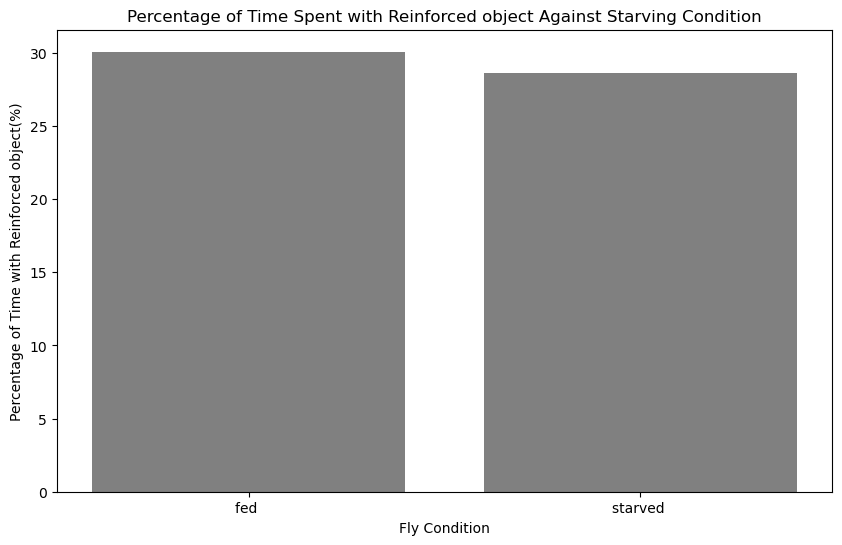

In [71]:
#barplot of time with reinforced object for the starving_cond
# Calculate the percentage of time spent with blue
df['reinforced_obj_norm'] = (df['tot_time_reinforc_obj'] / df['tot_time']) * 100

# Group the data and calculate the sum of 'percentage_time_blue'
grouped = df.groupby(['starving_cond', ])['reinforced_obj_norm'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped['starving_cond'] + ' ' , grouped['reinforced_obj_norm'], color = "grey")
plt.xlabel('Fly Condition')
plt.ylabel('Percentage of Time with Reinforced object(%)')
plt.title('Percentage of Time Spent with Reinforced object Against Starving Condition')
plt.show()
